# CROP RECOMMENDATION NOTEBOOK

## Import Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/root/Crop_recommendation.csv")

df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
## Check for Null Values
print("Null values in the dataset:")
print(df.isnull().sum())

print("\nTotal null values:", df.isnull().sum().sum())

## Replace null values with mean (if any exist)
# df = df.fillna(df.mean())


Null values in the dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Total null values: 0


In [15]:
## Check for Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


Number of duplicate rows: 0


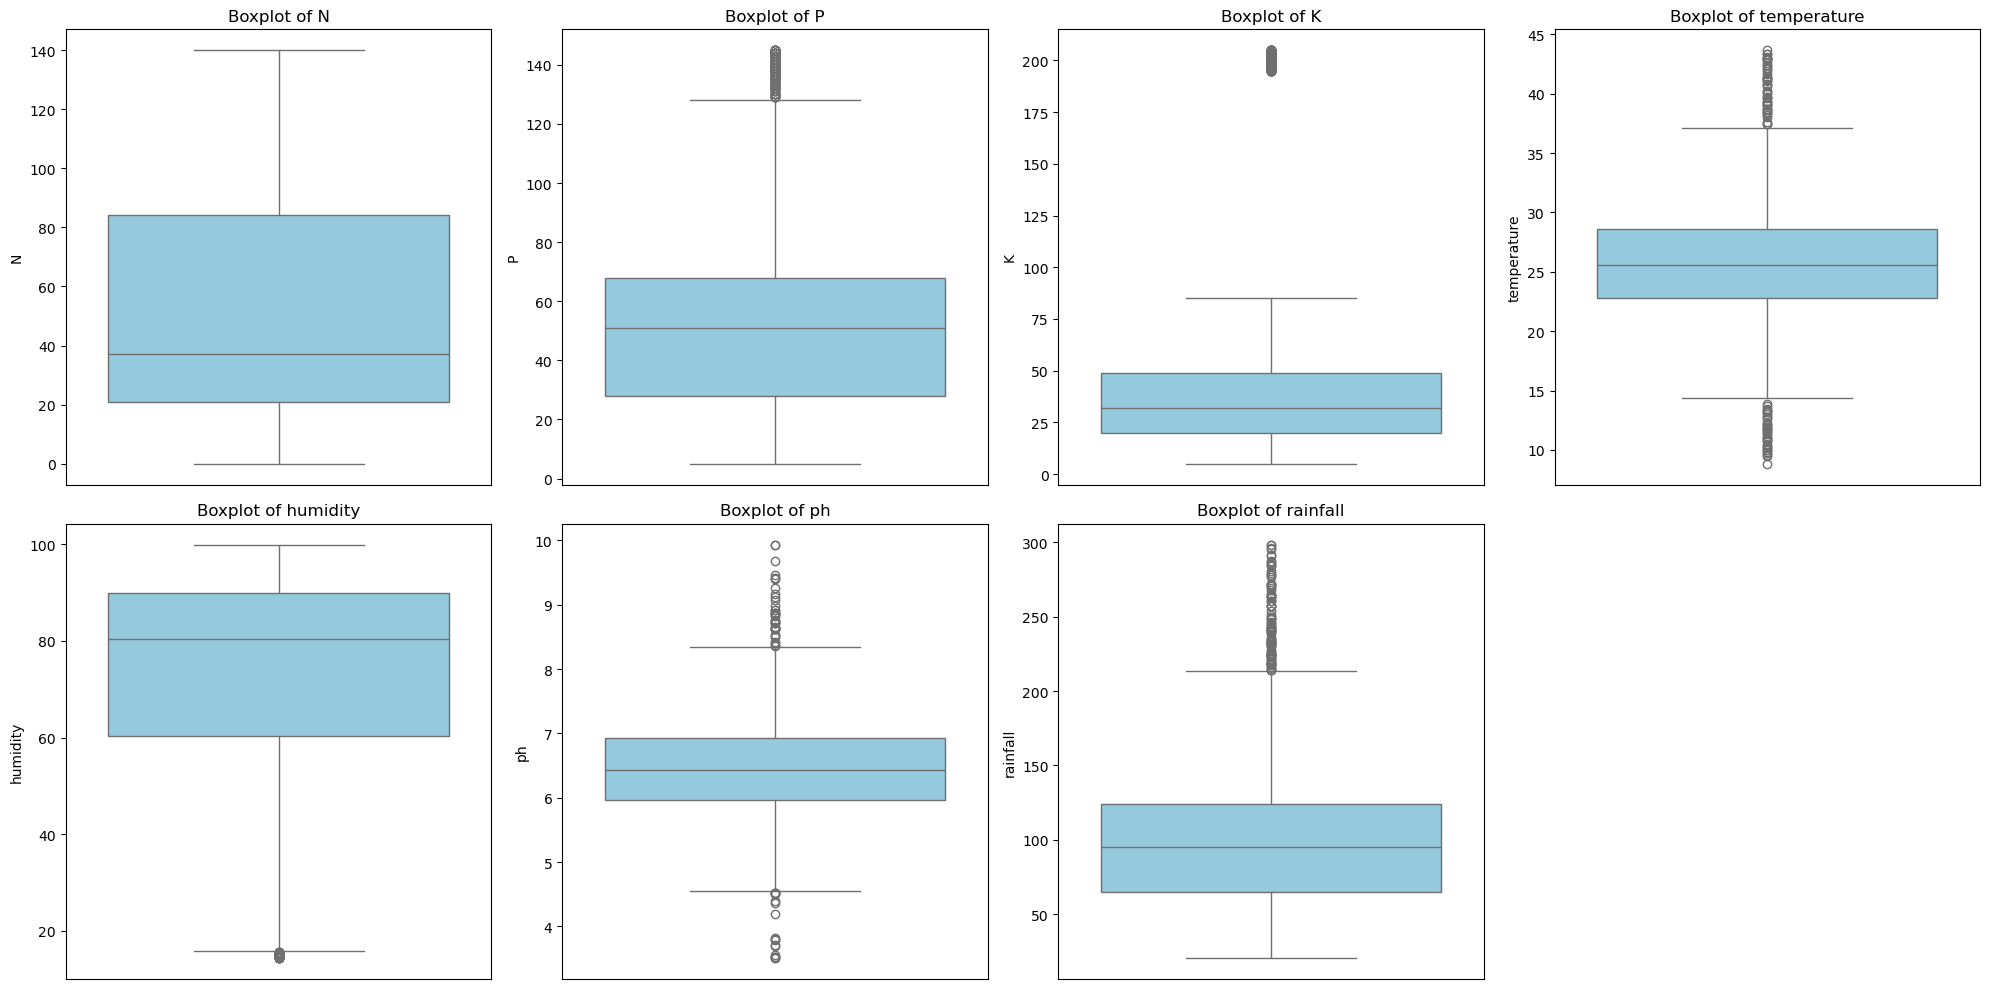

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt



## Check for Outliers using Box Plots
plt.figure(figsize=(20,10))

# Create subplots for each numerical column
for i, column in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xticks([])

plt.tight_layout()
plt.show()


In [23]:
## Outlier Detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for column in numerical_columns:
    n_outliers = detect_outliers(df, column)
    print(f"Number of outliers in {column}: {n_outliers}")

Number of outliers in N: 0
Number of outliers in P: 138
Number of outliers in K: 200
Number of outliers in temperature: 86
Number of outliers in humidity: 30
Number of outliers in ph: 57
Number of outliers in rainfall: 100


In [5]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df.shape

(2200, 8)

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df['label'].nunique()

22

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='ph', ylabel='Count'>

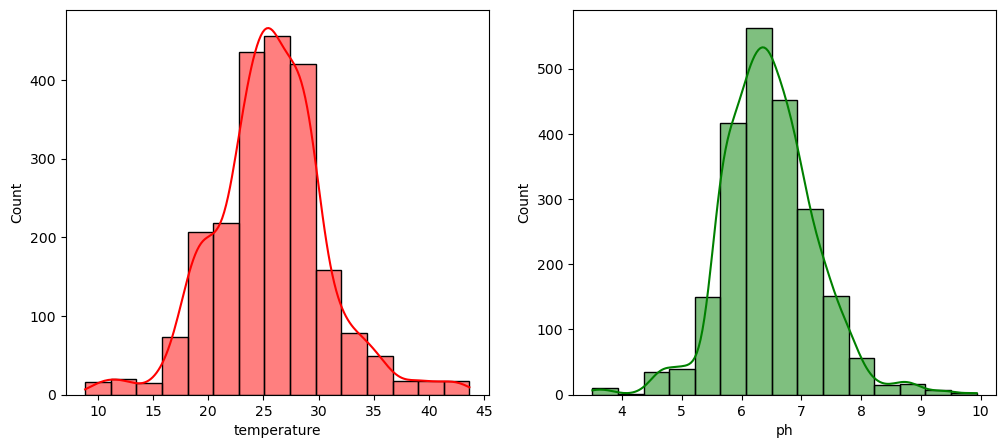

In [10]:
plt.figure(figsize=(12,5))

# Temperature distribution
plt.subplot(1, 2, 1)
sns.histplot(df['temperature'], color="red", bins=15, kde=True, alpha=0.5)

# pH distribution
plt.subplot(1, 2, 2)
sns.histplot(df['ph'], color="green", bins=15, kde=True, alpha=0.5)

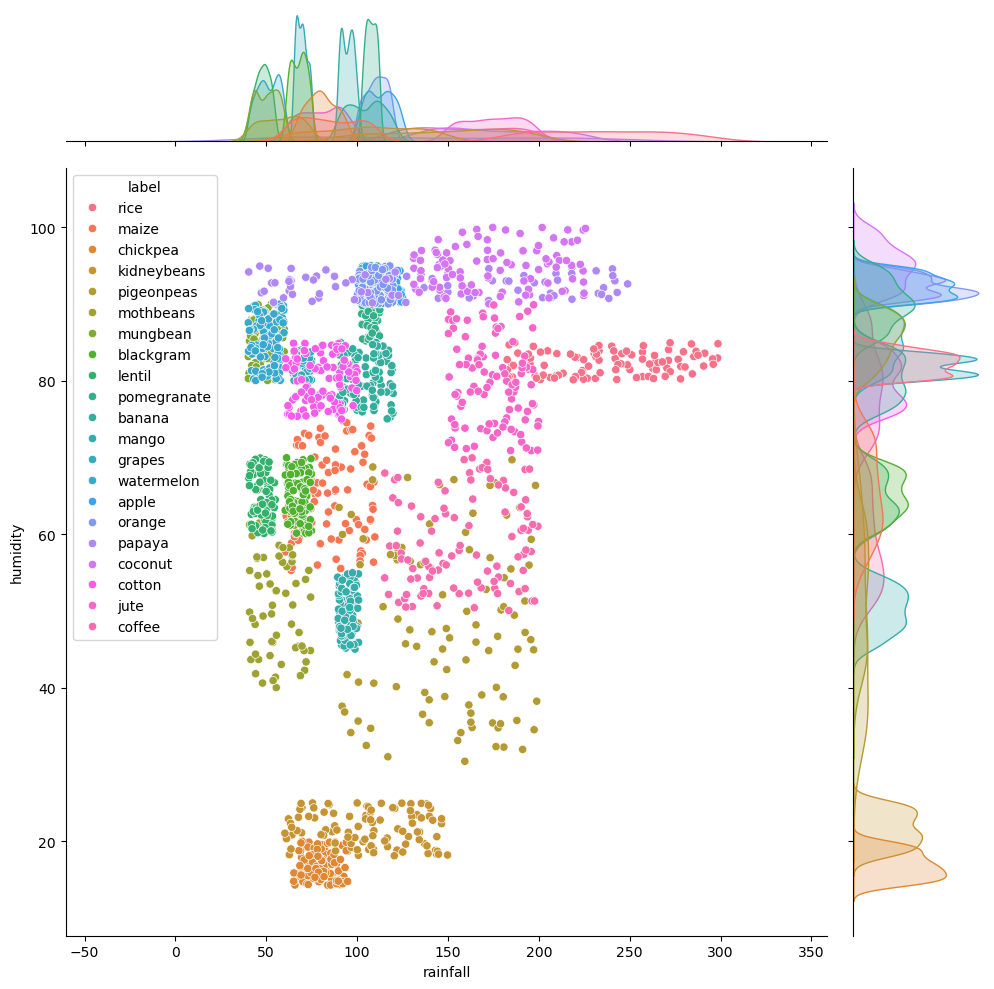

In [22]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<40) & 
                                                  (df['rainfall']>40)],height=10,hue="label")

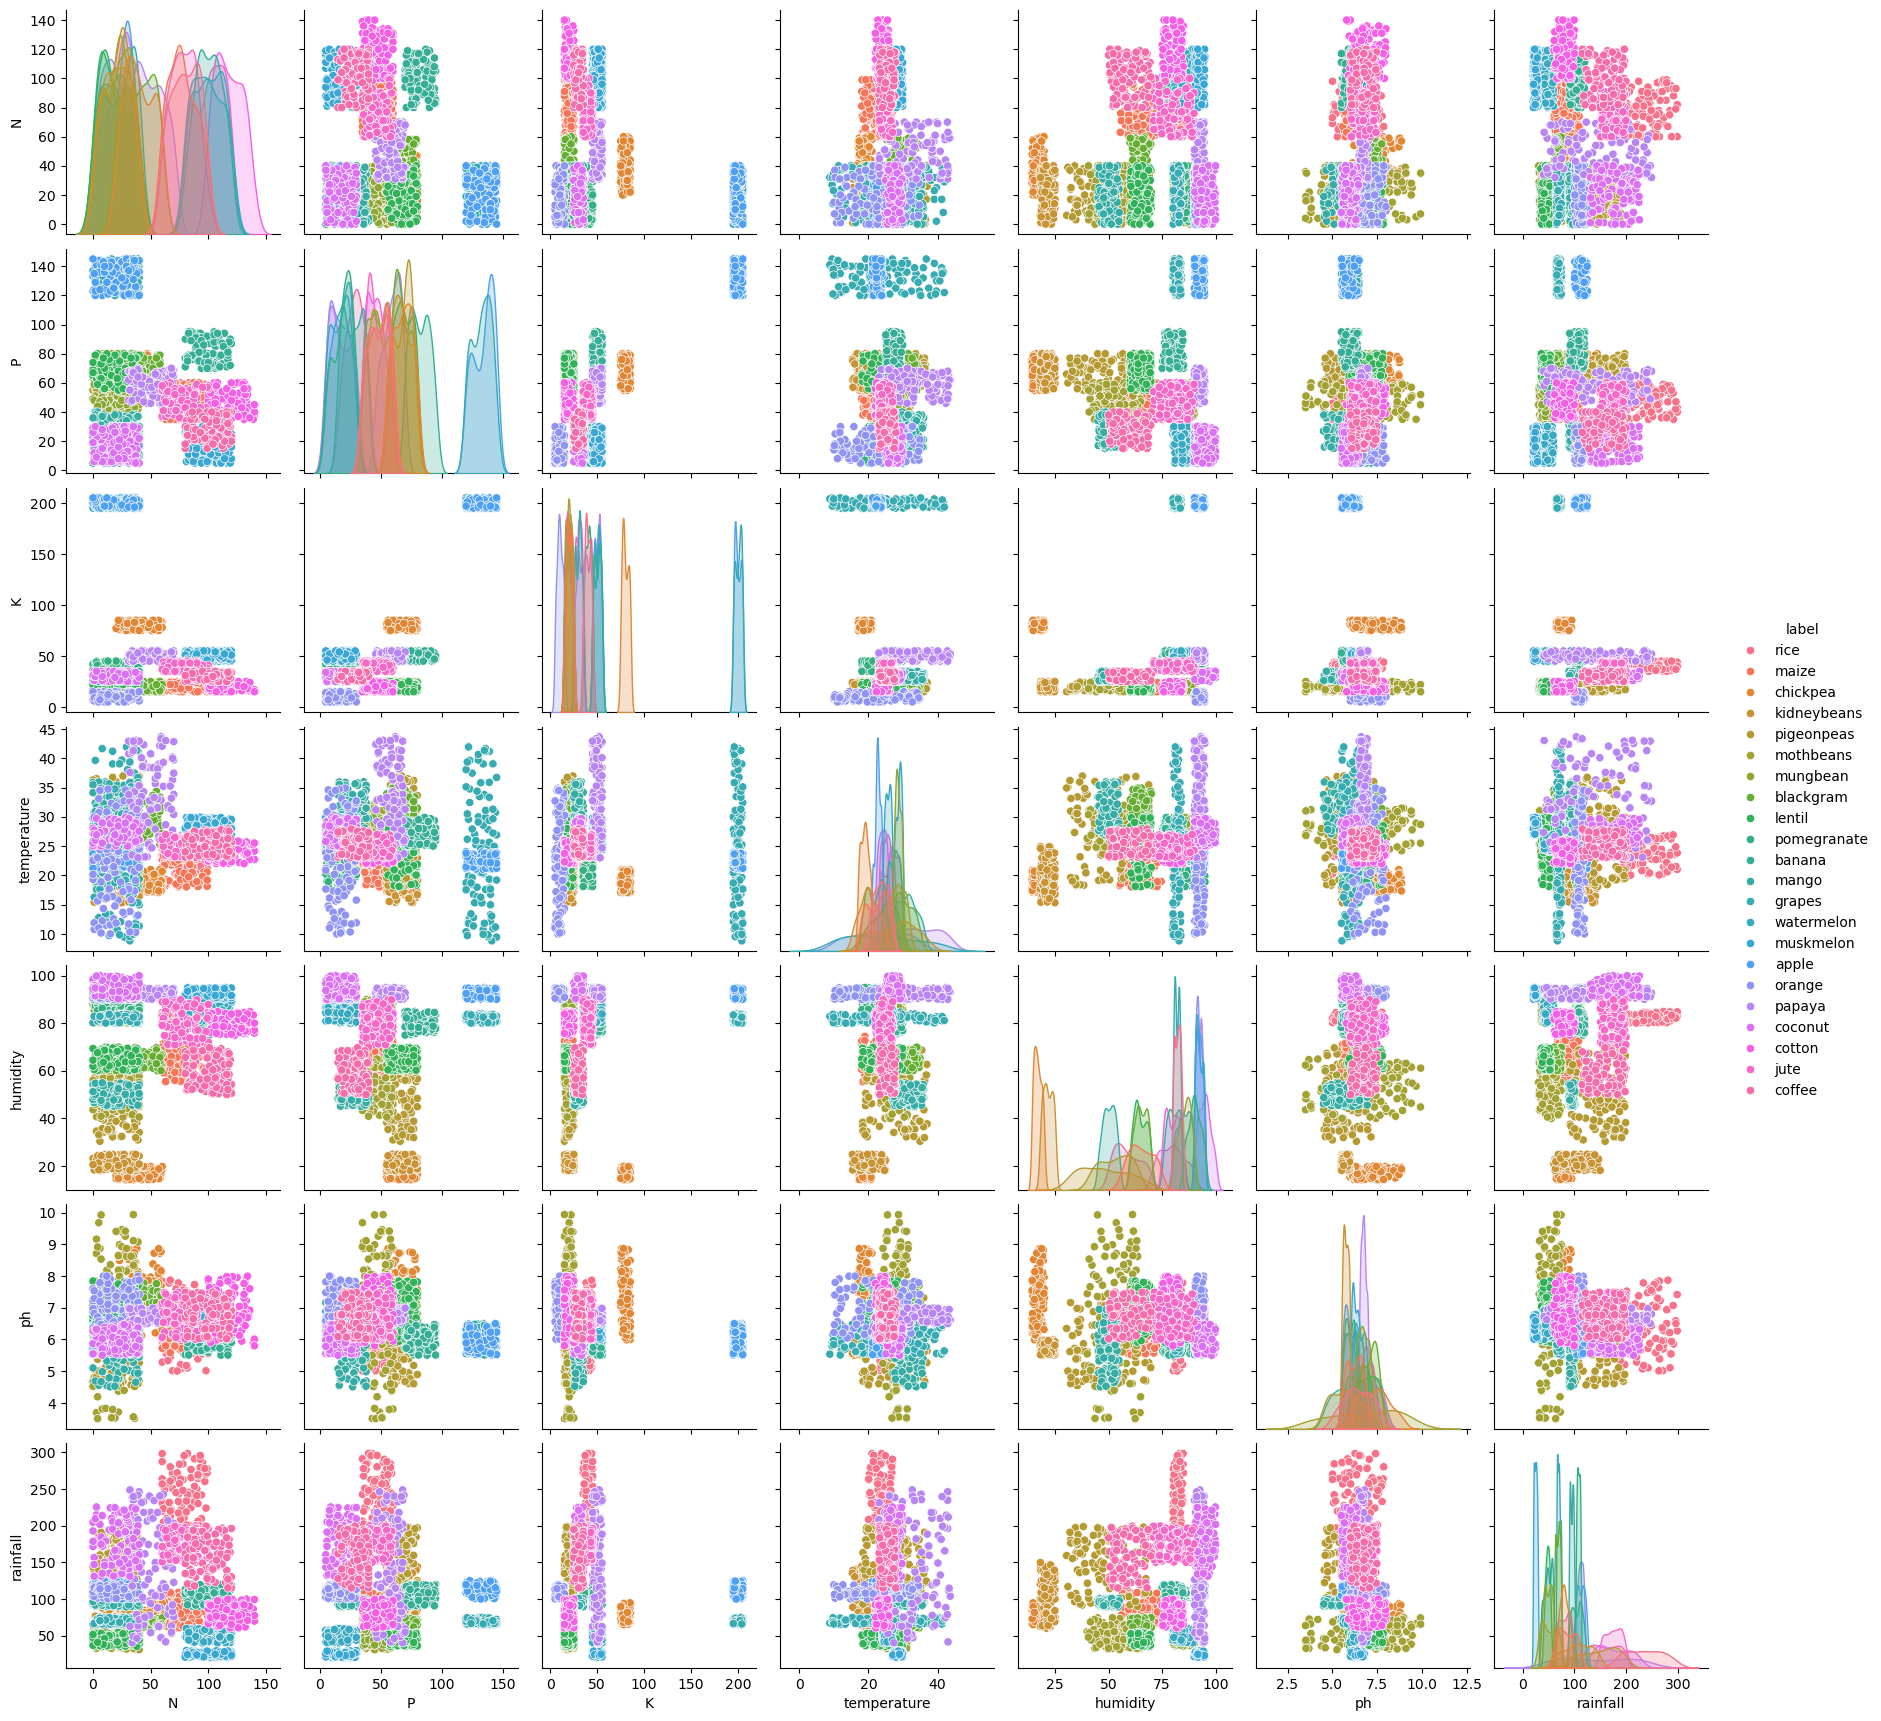

In [24]:
sns.pairplot(df,hue = 'label')

<Axes: xlabel='label', ylabel='ph'>

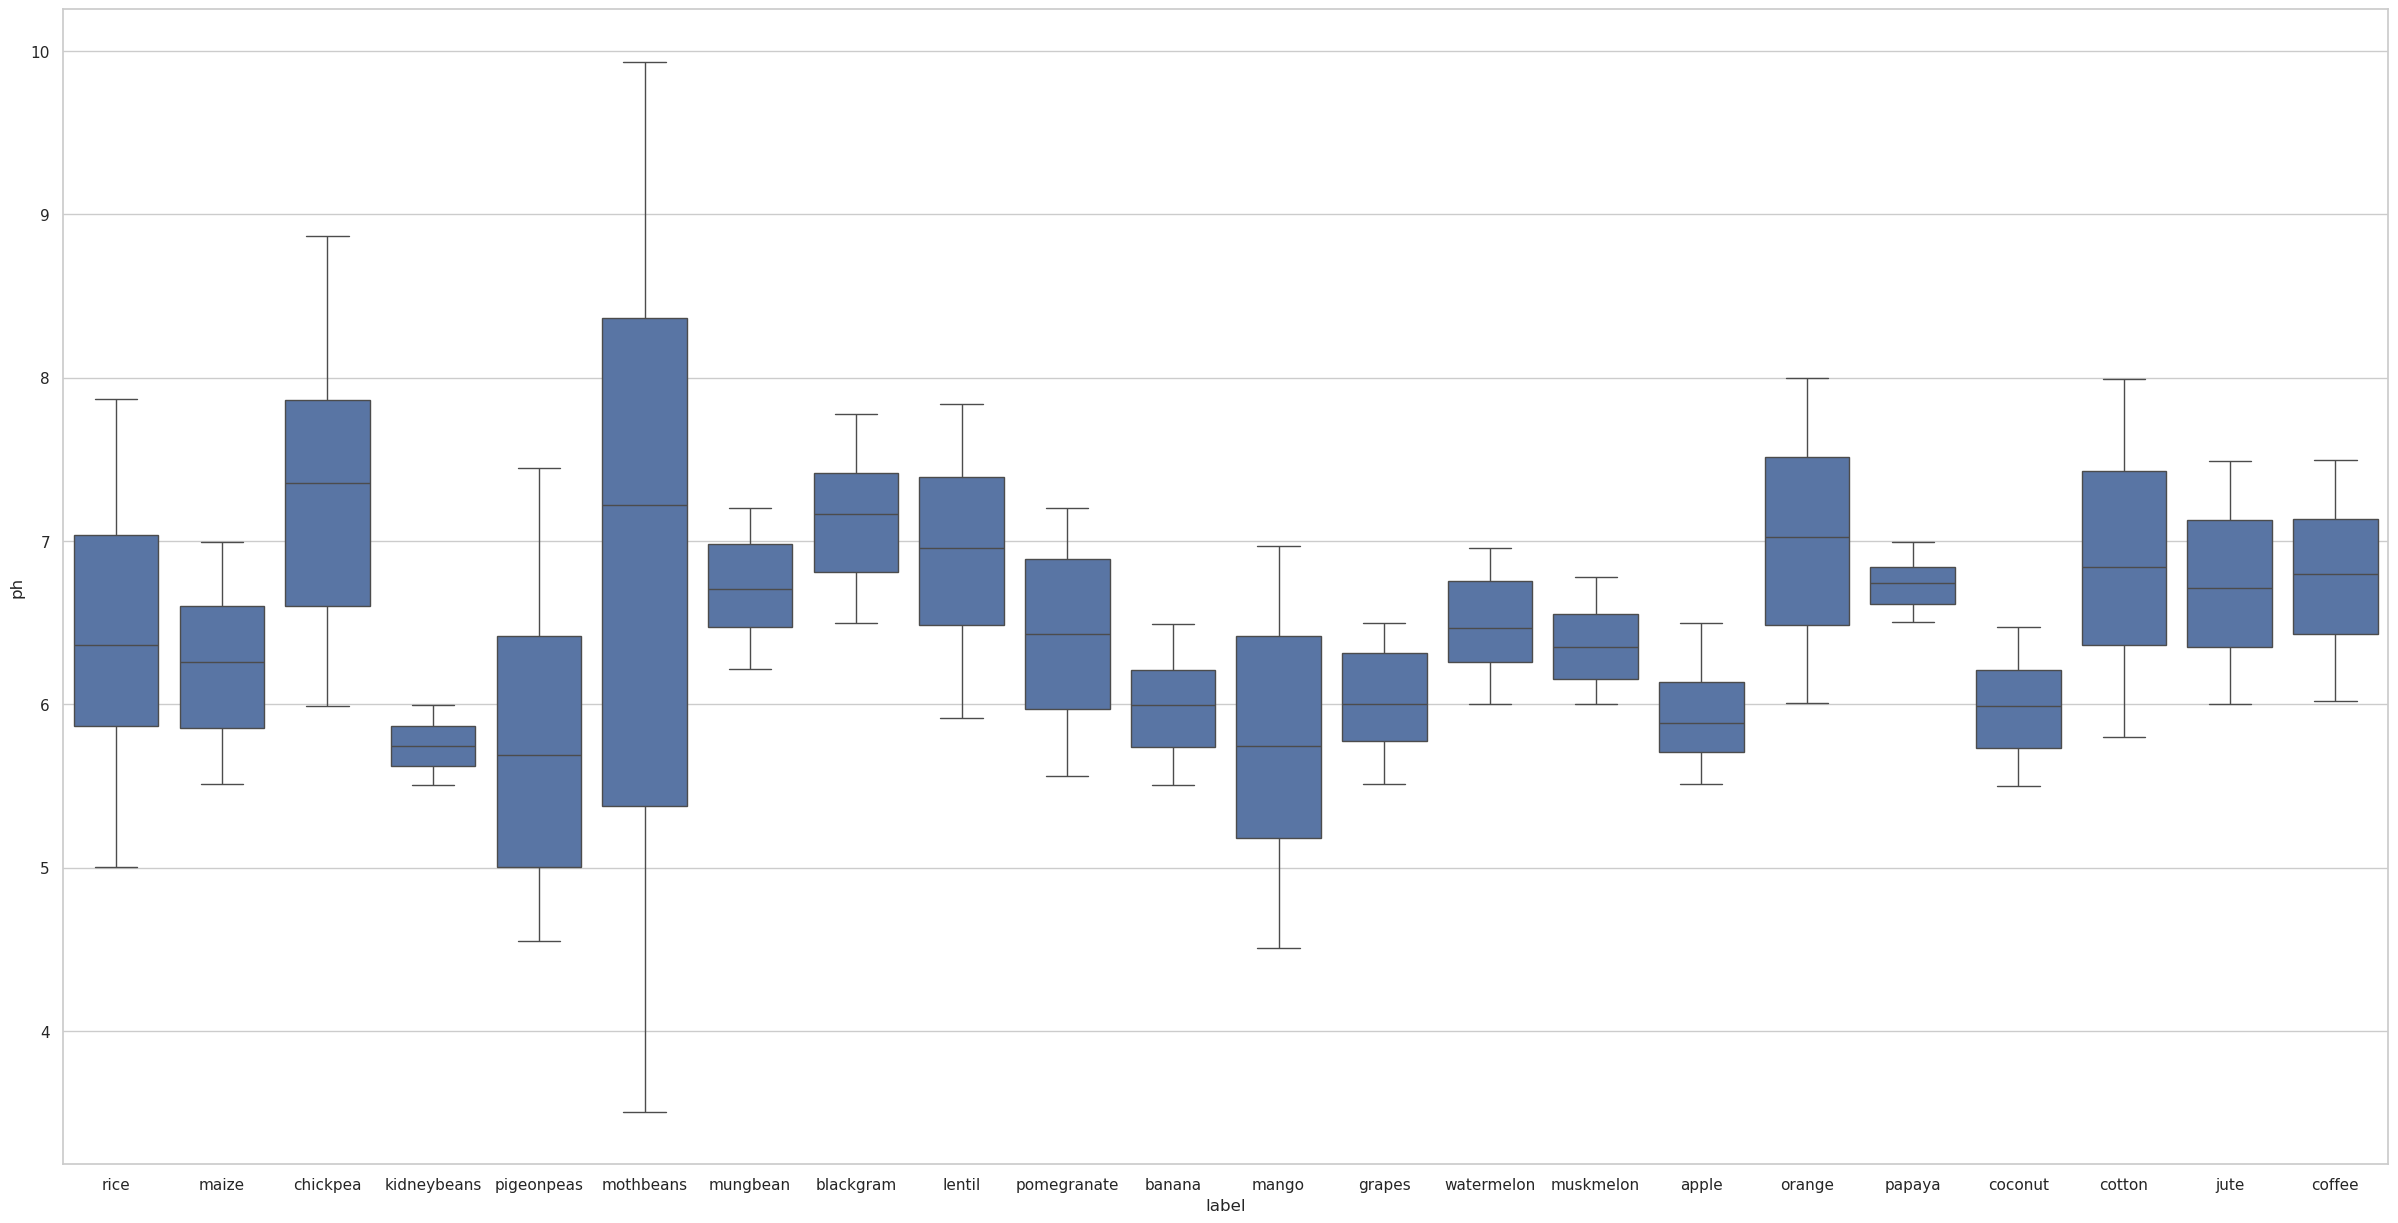

In [26]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=df)

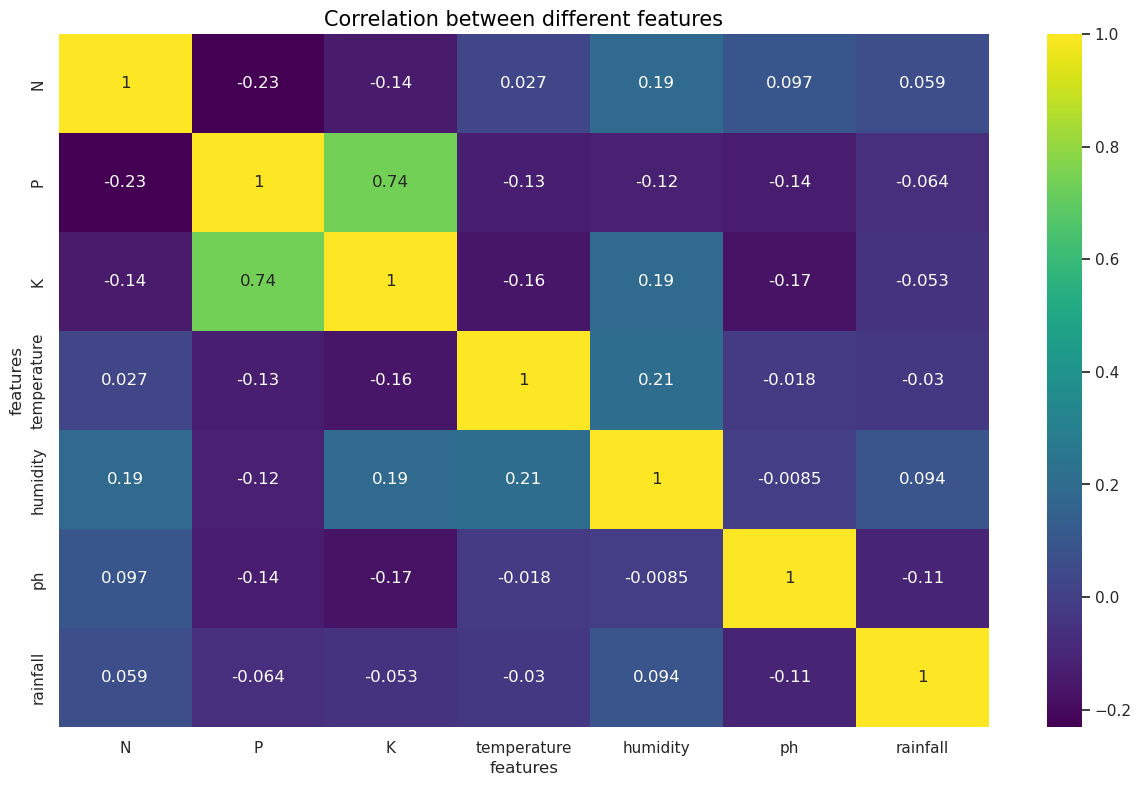

In [29]:
df_corr = df.drop(columns=["label"])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df_corr.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [7]:
df_summary = pd.pivot_table(df, index=['label'], aggfunc='mean')
df_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

In [8]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

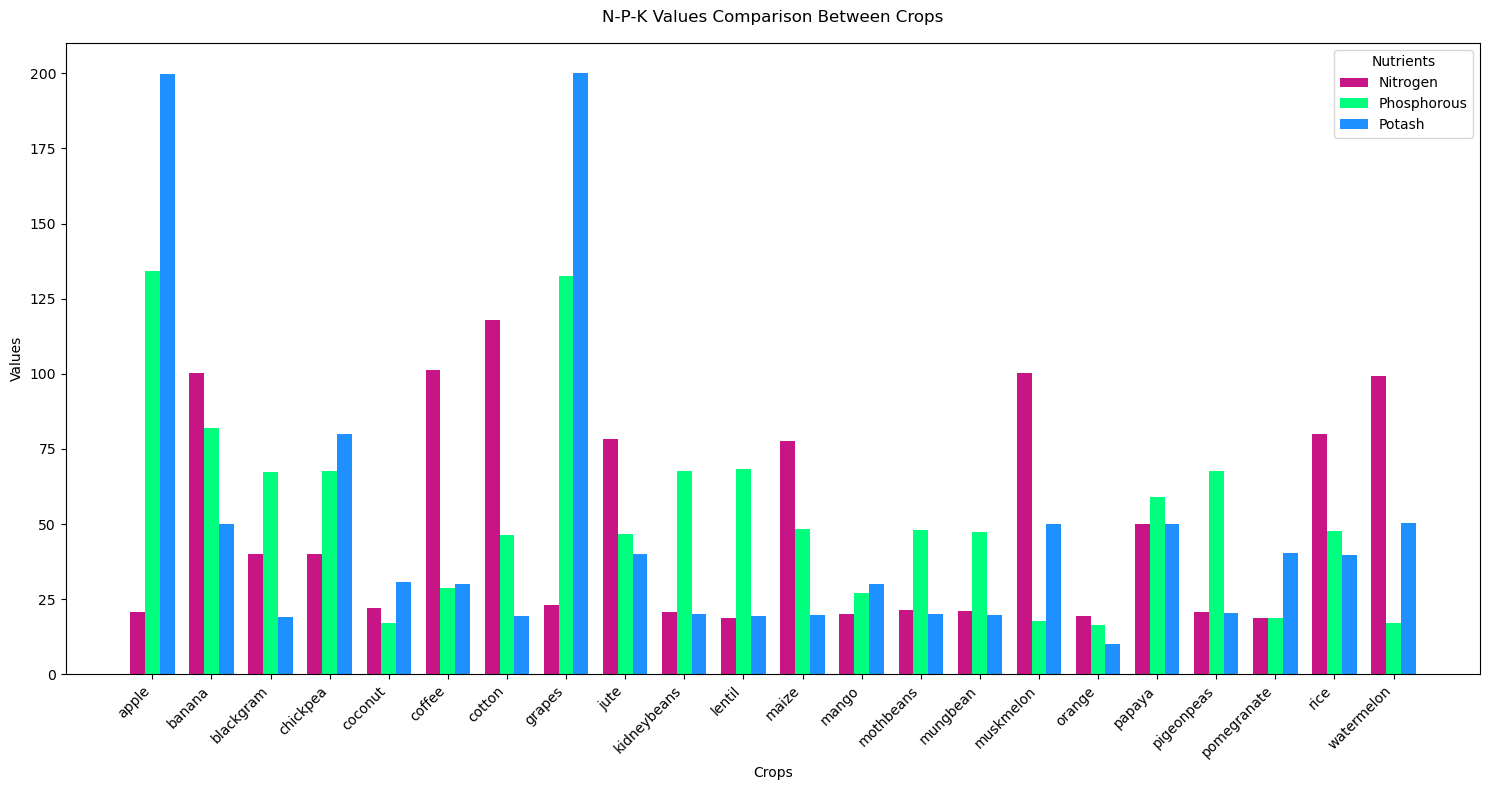

In [17]:
# Create the grouped bar plot
plt.figure(figsize=(15, 8))

# Plot each nutrient as a separate bar group
bar_width = 0.25
x = np.arange(len(df_summary.index))

plt.bar(x - bar_width, df_summary['N'], bar_width, label='Nitrogen', color='mediumvioletred')
plt.bar(x, df_summary['P'], bar_width, label='Phosphorous', color='springgreen')
plt.bar(x + bar_width, df_summary['K'], bar_width, label='Potash', color='dodgerblue')

# Customize the plot
plt.title('N-P-K Values Comparison Between Crops', fontsize=12, pad=15)
plt.xlabel('Crops')
plt.ylabel('Values')
plt.xticks(x, df_summary.index, rotation=45, ha='right')
plt.legend(title='Nutrients')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Feature Selection

In [33]:
# features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
features = df.drop(columns=['label'])
target = df['label']

In [34]:
acc = []
model = []

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state=42)

## Model Selection & Training

### Classification Algorithms

#### K-Nearest Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00 

In [38]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [39]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9897727272727272
knn_test_accuracy =  0.9704545454545455


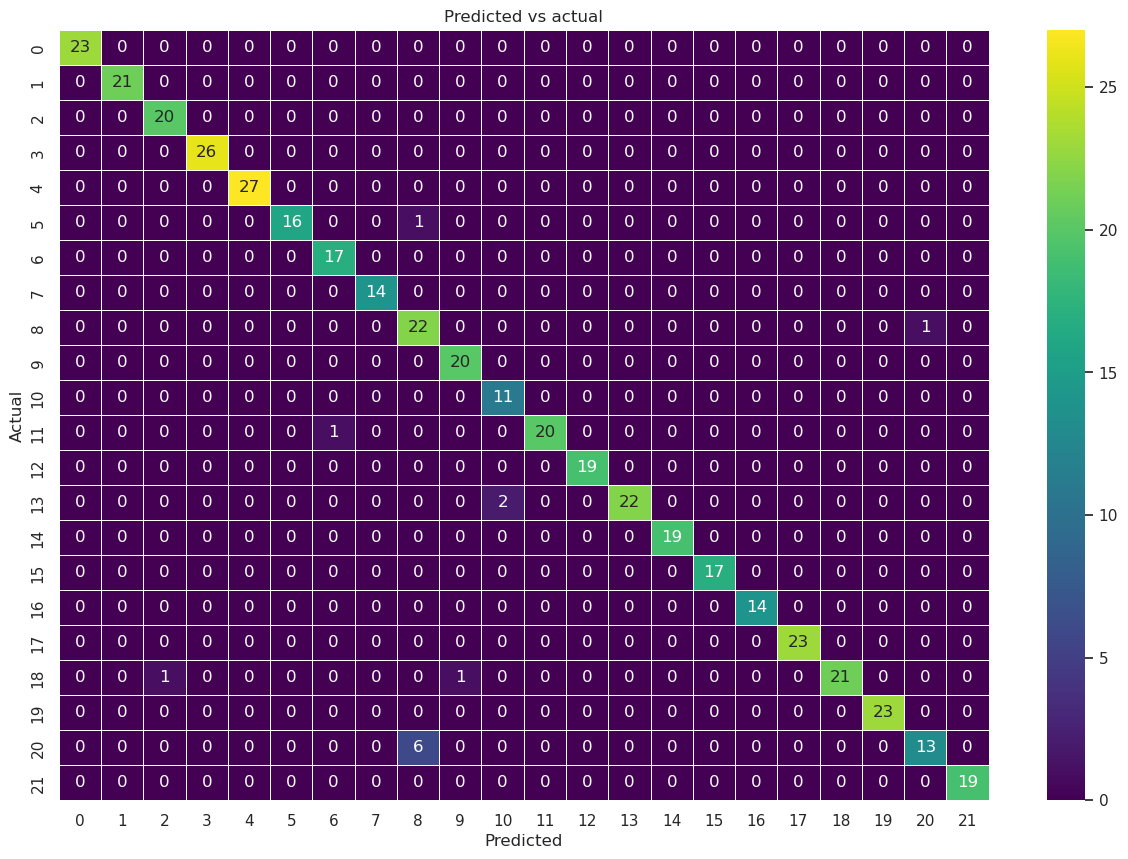

In [40]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

#### Hyperparameter Tuning

In [41]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.96590909, 0.95909091, 0.97045455, 0.96818182, 0.97045455,
       0.96818182, 0.96818182, 0.96136364, 0.96590909, 0.95909091,
       0.96590909, 0.96363636, 0.96590909, 0.96136364, 0.96136364,
       0.95909091, 0.95909091, 0.95227273, 0.95227273, 0.95454545])

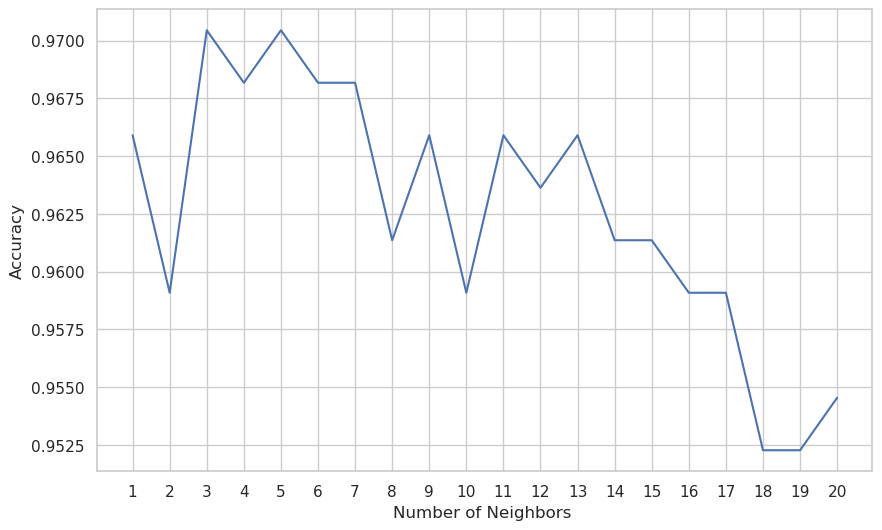

In [42]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

print("Best Score: ",g_res.best_score_)
print("Best Parameter: ",g_res.best_params_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
Best Score:  0.9812519259728707
Best Parameter:  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


In [44]:
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [45]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9704545454545455


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [47]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Training accuracy =  0.8875
Testing accuracy =  0.865909090909091


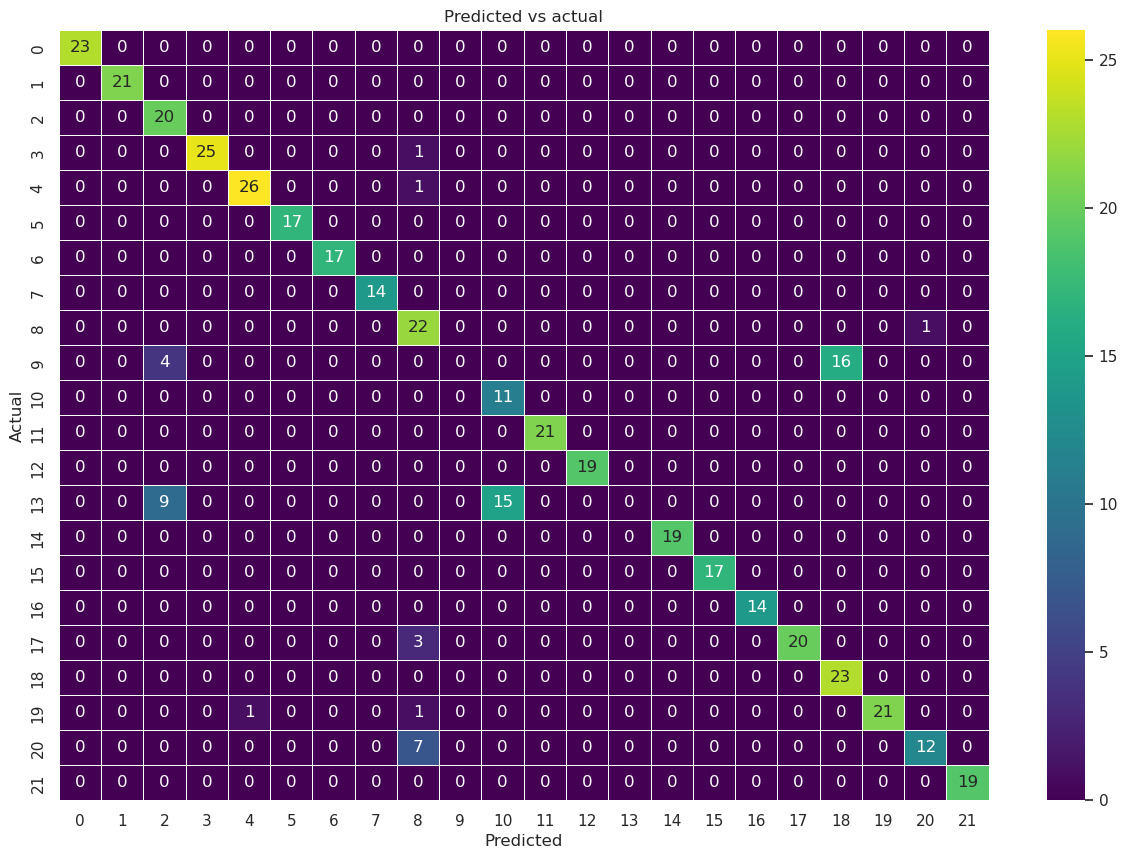

In [48]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [50]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]
Training accuracy =  1.0
Testing accuracy =  0.9931818181818182


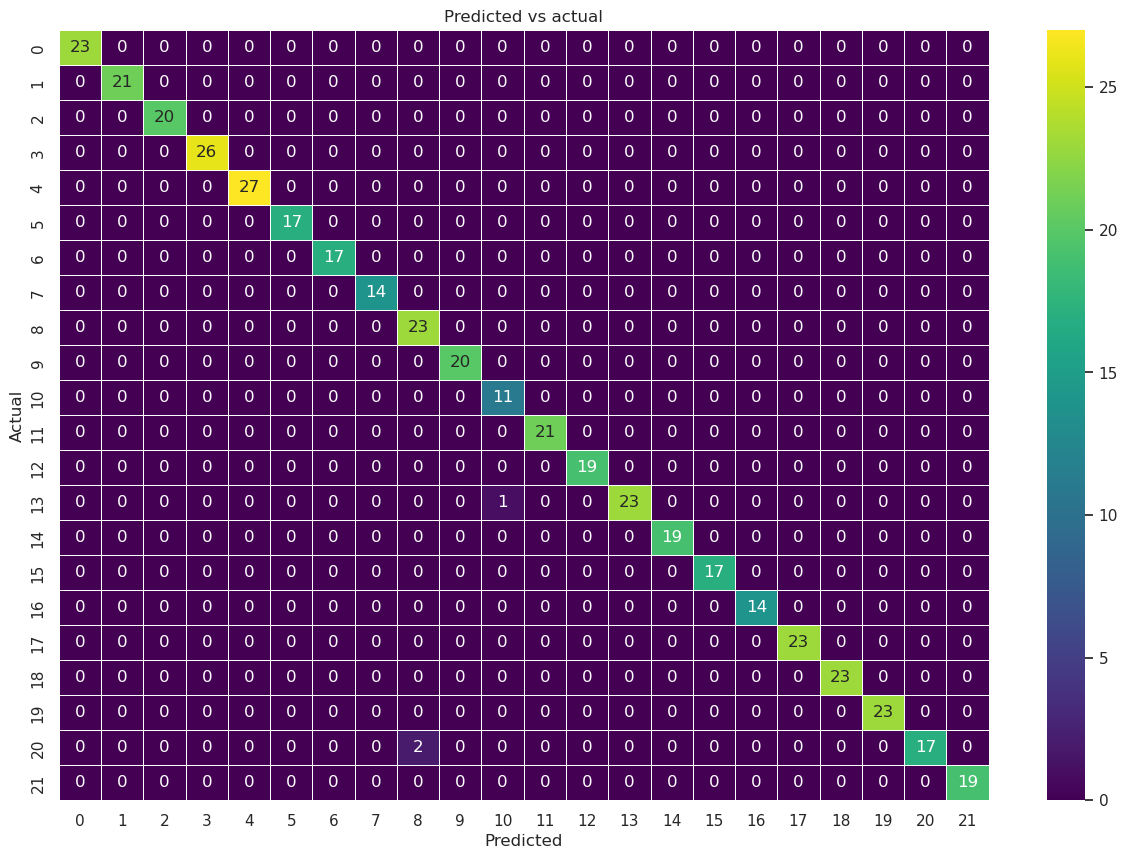

In [51]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

/tmp/ipykernel_576528/3093108104.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




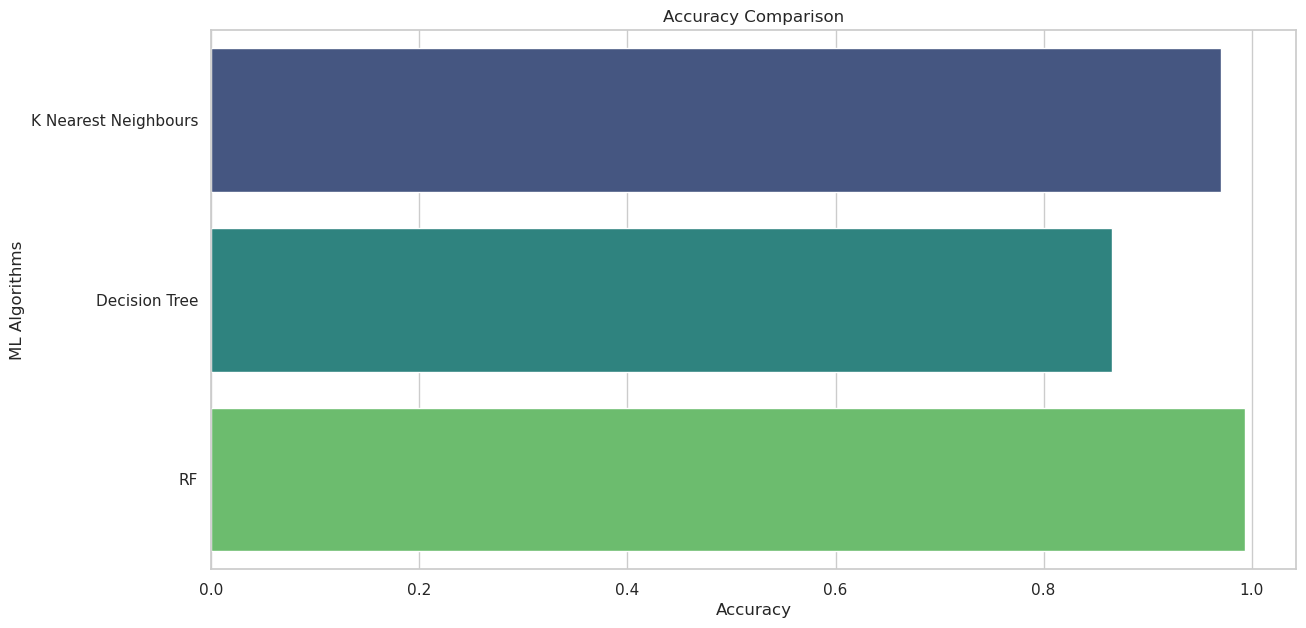

In [52]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

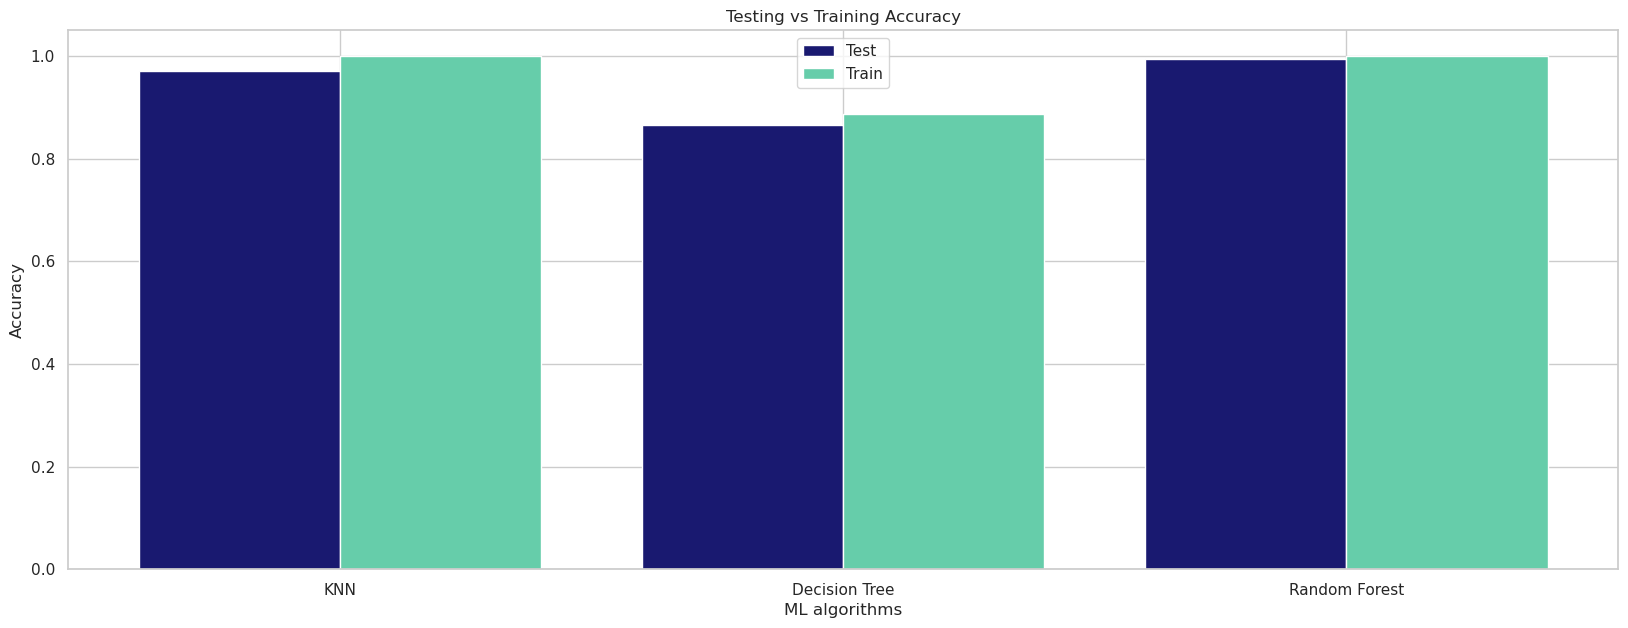

In [53]:
label = ['KNN', 'Decision Tree','Random Forest']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

### Inference

In [59]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data_sample=[90, 42, 43, 20.8, 82.3, 6.5, 202.93]

inference_test = pd.DataFrame([data_sample], columns=columns)

print(inference_test)
print("K-Nearest Neighbor Prediction: ", knn_1.predict(inference_test))
print("Decision Tree Prediction: ", DT.predict(inference_test))
print("Random Forest Prediction: ", RF.predict(inference_test))

    N   P   K  temperature  humidity   ph  rainfall
0  90  42  43         20.8      82.3  6.5    202.93
K-Nearest Neighbor Prediction:  ['rice']
Decision Tree Prediction:  ['rice']
Random Forest Prediction:  ['rice']
